In [1]:
%matplotlib inline

import pystan
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression Example
## Following STAN docs
### Generate some data

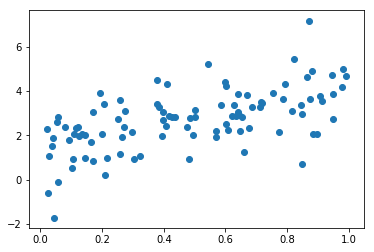

In [19]:
npts = 100
x = np.random.rand(npts)
m = 3.3
c = 1.2
s = 1.1
e = np.random.randn(npts) * s
y = m*x + c + e

fig, ax = plt.subplots()
ax.scatter(x, y)

dat = {'N': npts,
      'y': y,
      'x': x}

### Setup the STAN model

In [7]:
lin_code = '''
data {
    int<lower = 0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower = 0> sigma;
}
model {
    y ~ normal(alpha + beta * x, sigma);
}
'''
sm = pystan.StanModel(model_code=lin_code, model_name='LinReg')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL LinReg_26c34f8517638d1b81becfeceeccad6a NOW.


### Now do the sampling

/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


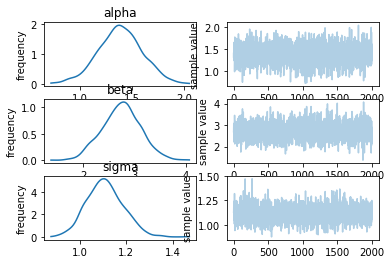

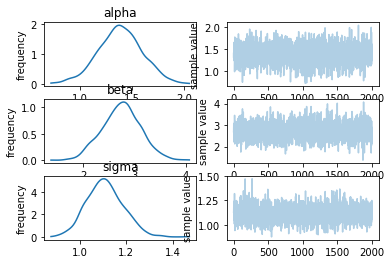

In [20]:
fit = sm.sampling(data=dat, iter=1000, chains=4, sample_file='lin_samples')
fit.plot()

In [21]:
print(fit)

Inference for Stan model: LinReg_26c34f8517638d1b81becfeceeccad6a.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   1.39  7.1e-3   0.21   0.95   1.25   1.38   1.53   1.79    863    1.0
beta    2.74    0.01   0.37   2.03   2.49   2.75   2.99   3.47    772   1.01
sigma   1.11  2.3e-3   0.08   0.96   1.05   1.11   1.16   1.27   1177    1.0
lp__  -59.44    0.04    1.2  -62.4 -60.03 -59.13 -58.56 -58.05    714    1.0

Samples were drawn using NUTS at Wed Feb 14 10:42:49 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [22]:
print(fit['alpha'].mean())

1.3864950271545782


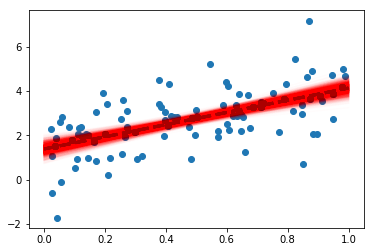

In [31]:
fig, ax = plt.subplots()
ax.scatter(x, y)
xx = np.linspace(0,1,100)
ax.plot(xx, fit['alpha'].mean() + fit['beta'].mean() * xx, 'k--', lw=3)
a = fit['alpha']
b = fit['beta']
for i in range(len(a)):
    ax.plot(xx, a[i] + b[i]*xx, 'r-', alpha=0.01)